In [50]:
#Importing the necessary packages

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
 

In [51]:
#Importing the NYC Dataset

data=pd.read_csv("NYCRequests.csv",low_memory=False,header=0,
    sep=',',index_col='Unique Key')

In [52]:
#Printing the first 5 rows

print(data.head())

                Created Date    Closed Date Agency  \
Unique Key                                           
32310363    12/31/2015 23:59  1/1/2016 0:55   NYPD   
32309934    12/31/2015 23:59  1/1/2016 1:26   NYPD   
32309159    12/31/2015 23:59  1/1/2016 4:51   NYPD   
32305098    12/31/2015 23:57  1/1/2016 7:43   NYPD   
32306529    12/31/2015 23:56  1/1/2016 3:24   NYPD   

                                Agency Name           Complaint Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location Type  Incident Zip  \
Unique Key                               

In [53]:
#Converting 'Created Date' column to datetime datatype
#Converting 'Closed Date' column to datetime datatype
#Creating a new column ‘RequestClosingTime’ as the time elapsed between request creation and request closing

data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date']=pd.to_datetime(data['Closed Date'])
data['RequestClosingTime'] = (data['Closed Date']-data['Created Date'])
#data['RequestClosingTime_Minutes']=int(round(data['RequestClosingTime'].total_seconds() / 60))
data = data.dropna(subset=['RequestClosingTime'])
data['RequestClosingTime_Minutes'] = data['RequestClosingTime'].apply(lambda x :int(round(x.total_seconds() / 60)))

In [54]:
#Printing the Data Type of all the columns

print(data.dtypes)

Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object
Due Date                                   object


In [55]:
data['RequestClosingTime_Minutes']

Unique Key
32310363      56
32309934      87
32309159     292
32305098     466
32306529     208
32306554     114
32306559     118
32307009     108
32308581     514
32308391      84
32305071     469
32306260     668
32306612     149
32305074     511
32309424     630
32309853     933
32305538     292
32310273      52
32306617     177
32308195      48
32310127     272
32307994     573
32307233      76
32308765      53
32308423    3891
32308426     197
32305916      27
32308379     341
32309402     107
32308850     150
            ... 
30279563      19
30282107     157
30283741     264
30284125     505
30283901     226
30282374     942
30280817      88
30283364     140
30280353      61
30280974     433
30280622     377
30282979     376
30281254      73
30281090     216
30283933     174
30283186     386
30284534     176
30281081      27
30280506     222
30281145      14
30282599     135
30280732      25
30283432     219
30280538     486
30279999     137
30281370      39
30281230     120
302

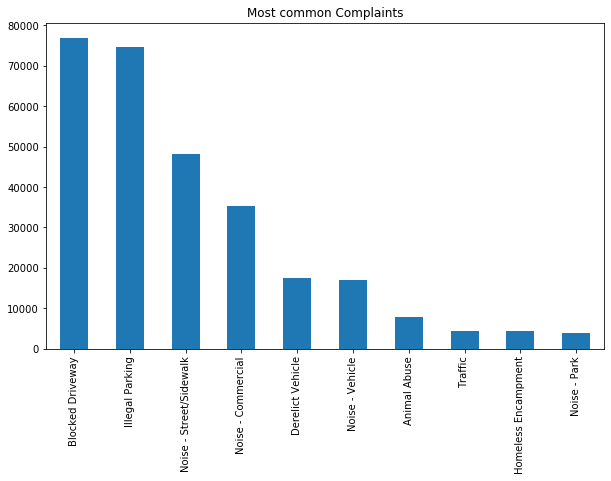

In [56]:
#plot complaint types - Most Common complaints

(data['Complaint Type'].value_counts()).head(10).plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')
plt.show()



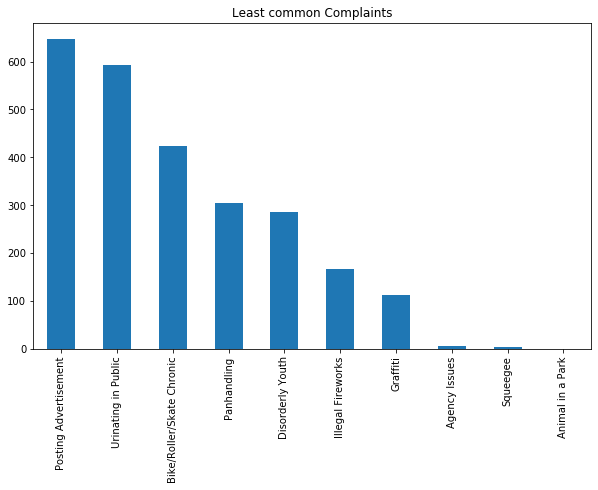

In [57]:
# Plot 'Least Common Complaints'

(data['Complaint Type'].value_counts()).tail(10).plot(kind='bar',
                   figsize=(10,6), title = 'Least common Complaints')
plt.show()


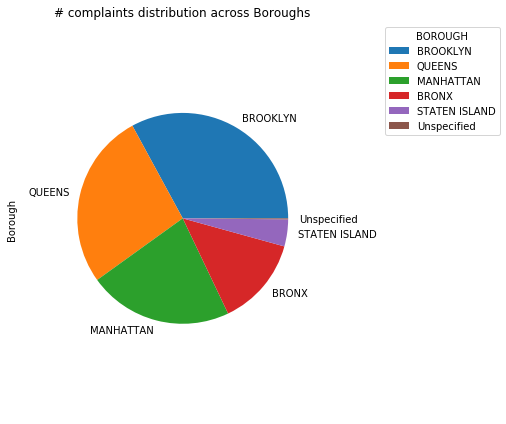

In [58]:
#Plot 'Number of complaints distributed by borough'

data['Borough'].value_counts().plot(kind='pie',
                         shadow=False, 
                        figsize = (8,6))

plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs')
plt.tight_layout()
plt.show()

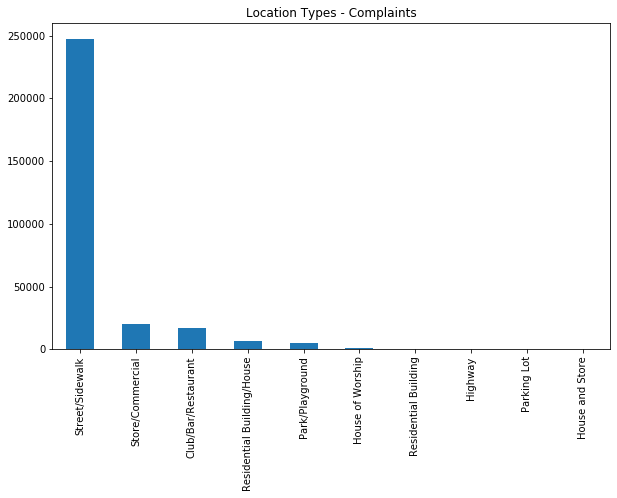

In [59]:
#Location types versus complaints

(data['Location Type'].value_counts()).head(10).plot(kind='bar',
                    figsize=(10,6), title = 'Location Types - Complaints')
plt.show()

In [60]:

#Grouping the complaints on the basis of time taken to close complaints

In [61]:
import math

In [62]:
def minToCategory(min):
    if (math.isnan(min)):
        return 'Unspecified'
    elif (min < 120.0):
        return 'Fast'
    elif (240.0 > min >= 120.0):
        return 'Medium'
    elif (360.0 > min >= 240.0):
        return 'Slow'
    else:
        return 'Very Slow'

In [63]:
data['Request_Closing_Time_Category'] = data['RequestClosingTime_Minutes'].apply(minToCategory)


In [64]:
print(data['Request_Closing_Time_Category'].head())

Unique Key
32310363         Fast
32309934         Fast
32309159         Slow
32305098    Very Slow
32306529       Medium
Name: Request_Closing_Time_Category, dtype: object


In [65]:
#Finding the unique categories 

data['Request_Closing_Time_Category'].value_counts()

Fast         115463
Medium        77211
Very Slow     63429
Slow          42431
Name: Request_Closing_Time_Category, dtype: int64

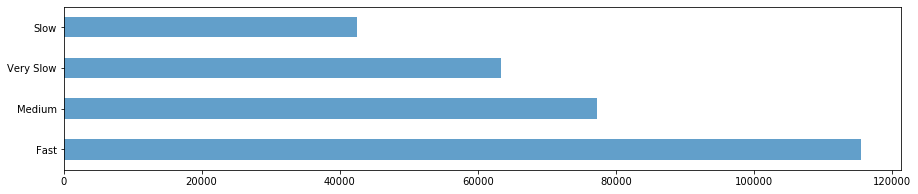

In [66]:
# Bar plot for Request_Closing_Time_Category

data['Request_Closing_Time_Category'].value_counts().plot(kind="barh", alpha=0.7, figsize=(15,3))
plt.show()

In [67]:
#Find the number of null values in 'City' column

data['City'].isnull().sum()


506

In [68]:
# Fill all missing values with 'Not Available'

data['City'].fillna('Not Available', inplace=True)

In [69]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

data_grouped = data.groupby(['City', 'Complaint Type'])
data_mean = data_grouped.mean()['RequestClosingTime_Minutes']


In [70]:
data_grouped = data.groupby(['City','Complaint Type']).agg({'RequestClosingTime_Minutes': 'mean'})


In [71]:
data_grouped

RequestClosingTime_Minutes
City      Complaint Type                                       
ARVERNE   Animal Abuse                               129.236842
          Blocked Driveway                           151.628571
          Derelict Vehicle                           177.962963
          Disorderly Youth                           215.500000
          Drinking                                    15.000000
          Graffiti                                    92.000000
          Homeless Encampment                        109.000000
          Illegal Parking                            139.017241
          Noise - Commercial                         137.500000
          Noise - House of Worship                    93.636364
          Noise - Park                                77.000000
          Noise - Street/Sidewalk                    119.482759
          Noise - Vehicle                            111.714286
          Panhandling                                 62.000000
          Urinating in Public                         42.000000
          Vending                                     29.000000
ASTORIA   Animal Abuse                               300.008000
          Bike/Roller/Skate Chronic                  104.266667
          Blocked Driveway                           288.957601
          Derelict Vehicle                           581.344729
          Disorderly Youth                           174.333333
          Drinking                                   283.314286
          Graffiti                                   846.000000
          Homeless Encampment                        294.937500
          Illegal Fireworks                          166.500000
          Illegal Parking                            289.996255
          Noise - Commercial                         187.972931
          Noise - House of Worship                   121.421053
          Noise - Park                               179.721311
          Noise - Street/Sidewalk                    207.059585
...                                                         ...
WOODHAVEN Noise - House of Worship                   198.333333
          Noise - Park                                82.666667
          Noise - Street/Sidewalk                    314.255814
          Noise - Vehicle                            204.270270
          Traffic                                    110.166667
          Urinating in Public                        204.500000
          Vending                                    170.500000
WOODSIDE  Animal Abuse                               506.391304
          Bike/Roller/Skate Chronic                  729.000000
          Blocked Driveway                           388.407936
          Derelict Vehicle                           563.008097
          Disorderly Youth                            73.000000
          Drinking                                   328.933333
          Graffiti                                   540.000000
          Homeless Encampment                        403.060606
          Illegal Fireworks                          148.000000
          Illegal Parking                            434.763187
          Noise - Commercial                         401.291866
          Noise - House of Worship                   284.666667
          Noise - Park                               405.131579
          Noise - Street/Sidewalk                    397.424000
          Noise - Vehicle                            328.876190
          Traffic                                    290.076923
          Urinating in Public                        385.500000
          Vending                                    438.000000
Woodside  Blocked Driveway                           384.181818
          Derelict Vehicle                           298.000000
          Illegal Parking                            313.180000
          Noise - Commercial                         143.500000
          Noise - Street/Sidewalk                    204.800000

[778

In [72]:
# drop null values from this group

data_grouped_withoutna = data_grouped.dropna()

In [73]:
print(data_grouped_withoutna)


                                     RequestClosingTime_Minutes
City      Complaint Type                                       
ARVERNE   Animal Abuse                               129.236842
          Blocked Driveway                           151.628571
          Derelict Vehicle                           177.962963
          Disorderly Youth                           215.500000
          Drinking                                    15.000000
          Graffiti                                    92.000000
          Homeless Encampment                        109.000000
          Illegal Parking                            139.017241
          Noise - Commercial                         137.500000
          Noise - House of Worship                    93.636364
          Noise - Park                                77.000000
          Noise - Street/Sidewalk                    119.482759
          Noise - Vehicle                            111.714286
          Panhandling                   

In [74]:
# Sorting by column - RequestClosingTime_Minutes for City on grouped data
data_sorted = data_grouped_withoutna.sort_values(['City', 'RequestClosingTime_Minutes'])
data_sorted

RequestClosingTime_Minutes
City      Complaint Type                                       
ARVERNE   Drinking                                    15.000000
          Vending                                     29.000000
          Urinating in Public                         42.000000
          Panhandling                                 62.000000
          Noise - Park                                77.000000
          Graffiti                                    92.000000
          Noise - House of Worship                    93.636364
          Homeless Encampment                        109.000000
          Noise - Vehicle                            111.714286
          Noise - Street/Sidewalk                    119.482759
          Animal Abuse                               129.236842
          Noise - Commercial                         137.500000
          Illegal Parking                            139.017241
          Blocked Driveway                           151.628571
          Derelict Vehicle                           177.962963
          Disorderly Youth                           215.500000
ASTORIA   Panhandling                                 69.000000
          Bike/Roller/Skate Chronic                  104.266667
          Noise - House of Worship                   121.421053
          Illegal Fireworks                          166.500000
          Disorderly Youth                           174.333333
          Noise - Park                               179.721311
          Noise - Commercial                         187.972931
          Noise - Street/Sidewalk                    207.059585
          Noise - Vehicle                            210.539216
          Urinating in Public                        277.555556
          Drinking                                   283.314286
          Blocked Driveway                           288.957601
          Illegal Parking                            289.996255
          Homeless Encampment                        294.937500
...                                                         ...
WOODHAVEN Noise - Commercial                         233.525714
          Animal Abuse                               298.088889
          Noise - Street/Sidewalk                    314.255814
          Blocked Driveway                           331.370161
          Illegal Parking                            343.755132
          Homeless Encampment                        426.222222
          Derelict Vehicle                           446.980519
WOODSIDE  Disorderly Youth                            73.000000
          Illegal Fireworks                          148.000000
          Noise - House of Worship                   284.666667
          Traffic                                    290.076923
          Noise - Vehicle                            328.876190
          Drinking                                   328.933333
          Urinating in Public                        385.500000
          Blocked Driveway                           388.407936
          Noise - Street/Sidewalk                    397.424000
          Noise - Commercial                         401.291866
          Homeless Encampment                        403.060606
          Noise - Park                               405.131579
          Illegal Parking                            434.763187
          Vending                                    438.000000
          Animal Abuse                               506.391304
          Graffiti                                   540.000000
          Derelict Vehicle                           563.008097
          Bike/Roller/Skate Chronic                  729.000000
Woodside  Noise - Commercial                         143.500000
          Noise - Street/Sidewalk                    204.800000
          Derelict Vehicle                           298.000000
          Illegal Parking                            313.180000
          Blocked Driveway                           384.181818

[778

Performing a statistical test for the following:

Whether the average response time across complaint types is similar or not (overall)

Are the type of complaint or service requested and location related?

In [76]:
import scipy.stats as stats
from math import sqrt

In [77]:
#Stating Null and Alternate Hypothesis

# H0 : average response time across complaint types is similar 
# H1 : average response time across complaint types is not similar 

data['Complaint Type'].value_counts()

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [78]:
#Getting Top 5 complaint types

top5_complaints_type = data['Complaint Type'].value_counts()[:5]
top5_complaints_type

Blocked Driveway           76810
Illegal Parking            74532
Noise - Street/Sidewalk    48076
Noise - Commercial         35247
Derelict Vehicle           17588
Name: Complaint Type, dtype: int64

In [79]:
top5_complaints_type_names = top5_complaints_type.index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [80]:
#Subsetting Data based on Complaint Type 
sample_data = data.loc[data['Complaint Type'].isin(top5_complaints_type_names), ['Complaint Type', 'RequestClosingTime_Minutes']]
sample_data.head()

,Complaint Type,RequestClosingTime_Minutes
Unique Key,,
32310363,Noise - Street/Sidewalk,56
32309934,Blocked Driveway,87
32309159,Blocked Driveway,292
32305098,Illegal Parking,466
32306529,Illegal Parking,208


In [81]:
#Checking whether the dataset has null values

sample_data.isnull().sum()


Complaint Type                0
RequestClosingTime_Minutes    0
dtype: int64

In [82]:
sample_data.shape


(252253, 2)

In [83]:
s1 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[0]].RequestClosingTime_Minutes
s1.head()

Unique Key
32309934     87
32309159    292
32307009    108
32308391     84
32305071    469
Name: RequestClosingTime_Minutes, dtype: int64

In [84]:
s2 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[1]].RequestClosingTime_Minutes
s2.head()

Unique Key
32305098    466
32306529    208
32306554    114
32306559    118
32308581    514
Name: RequestClosingTime_Minutes, dtype: int64

In [85]:
s3 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[2]].RequestClosingTime_Minutes
s3.head()

Unique Key
32310363     56
32306612    149
32308195     48
32308014     30
32308825     90
Name: RequestClosingTime_Minutes, dtype: int64

In [86]:
s4 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[3]].RequestClosingTime_Minutes
s4.head()

Unique Key
32310273     52
32306617    177
32307233     76
32308850    150
32310297    120
Name: RequestClosingTime_Minutes, dtype: int64

In [87]:
s5 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[4]].RequestClosingTime_Minutes
s5.head()

Unique Key
32309424    630
32306497    238
32305124     82
32308002    248
32305798     45
Name: RequestClosingTime_Minutes, dtype: int64

In [88]:
stats.f_oneway(s1, s2, s3, s4, s5)


F_onewayResult(statistic=1799.608830438338, pvalue=0.0)

In [89]:
#Are the type of complaint or service requested and location related?

# H0 : 2 categories - Complain Type and Location is independent 
# Ha : 2 categories - Complain Type and Location is dependent

In [90]:
top5_location = data['City'].value_counts()[:5]
top5_location

BROOKLYN         98295
NEW YORK         65972
BRONX            40697
STATEN ISLAND    12338
JAMAICA           7294
Name: City, dtype: int64

In [91]:
top5_location_names = top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [92]:
sample_data_location_c_type = data.loc[(data['Complaint Type'].isin(top5_complaints_type_names)) & (data['City'].isin(top5_location_names)), ['Complaint Type', 'City']]
sample_data_location_c_type.head()

,Complaint Type,City
Unique Key,,
32310363,Noise - Street/Sidewalk,NEW YORK
32309159,Blocked Driveway,BRONX
32305098,Illegal Parking,BRONX
32306554,Illegal Parking,BROOKLYN
32306559,Illegal Parking,NEW YORK


In [93]:
pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City'], margins=True)


City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12754,28147,2817,2070,2142,47930
Derelict Vehicle,1952,5179,953,537,1766,10387
Illegal Parking,7859,27461,1421,12125,4886,53752
Noise - Commercial,2433,11458,429,14544,677,29541
Noise - Street/Sidewalk,8890,13354,339,20426,816,43825
All,33888,85599,5959,49702,10287,185435


In [94]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City']))


In [95]:
print(ch2)
print(p_value)

40522.94060211538
0.0


In [97]:
# pvalue is less than 0.05 so we reject null hypothesis means complain type and location is not independent.
